In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score


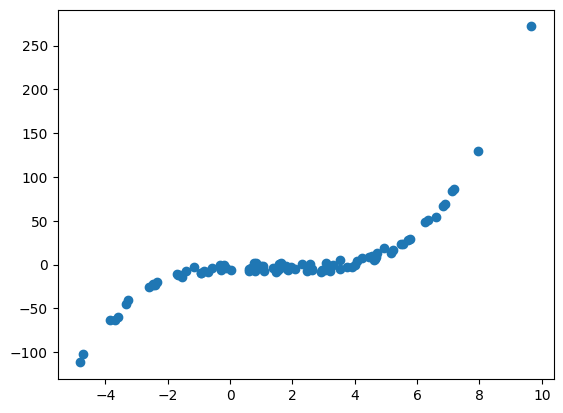

In [16]:
np.random.seed(1)
X=2-3*np.random.normal(0,1,100)
y=X-2*(X**2)+0.5*(X**3)+np.random.normal(-3,3,100)
plt.scatter(X,y)
plt.show()

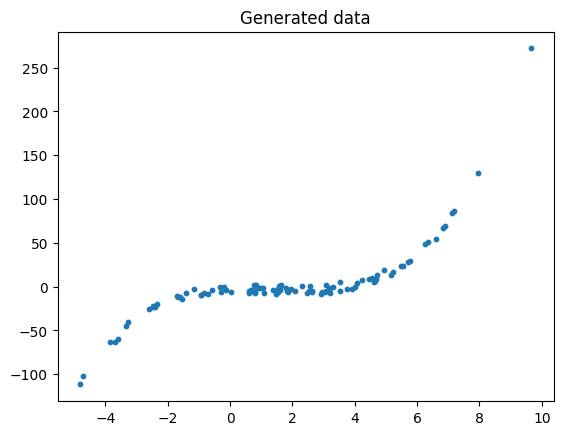

In [17]:
X=X[:,np.newaxis]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
plt.scatter(X,y,s=10)
plt.title('Generated data')
plt.show()

Linear Regression
MSE: 493.196547535584
R2: 0.6894091128154399


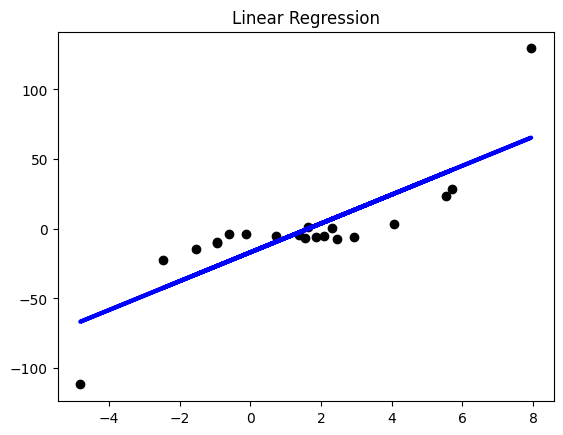

In [18]:
linear_regressor=LinearRegression()
linear_regressor.fit(X_train,y_train)
y_pred_linear=linear_regressor.predict(X_test)
mse_linear=mean_squared_error(y_test,y_pred_linear)
r2_linear=r2_score(y_test,y_pred_linear)
print('Linear Regression')
print('MSE:',mse_linear)
print('R2:',r2_linear)
plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,y_pred_linear,color='blue',linewidth=3)
plt.title('Linear Regression')
plt.show()

Polynomial Regression
MSE: 8.727114881750316
R2: 0.9945040930087029


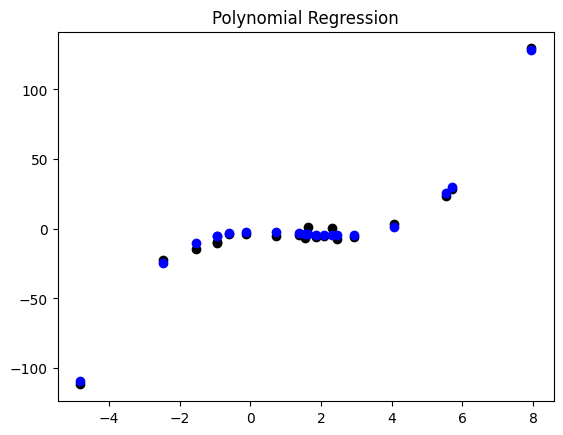

In [25]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_regressor=LinearRegression()
poly_regressor.fit(X_poly,y_train)
y_pred_poly=poly_regressor.predict(X_test_poly)
mse_poly=mean_squared_error(y_test,y_pred_poly)
r2_poly=r2_score(y_test,y_pred_poly)
print('Polynomial Regression')
print('MSE:',mse_poly)
print('R2:',r2_poly)
plt.scatter(X_test,y_test,color='black')
plt.scatter(X_test,y_pred_poly,color='blue')
plt.title('Polynomial Regression')
plt.show()

Ridge Regression
MSE: 8.734426276579162
R2: 0.9944994886524522


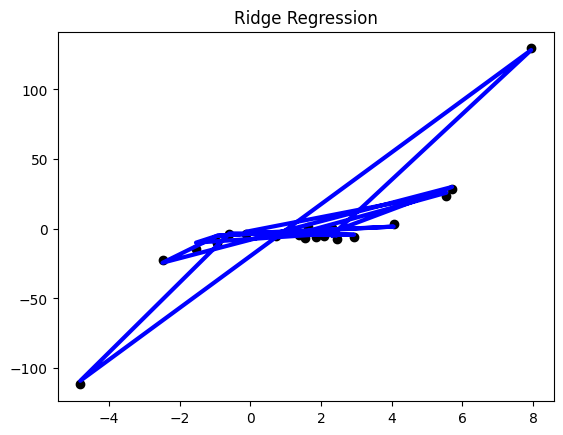

In [26]:
ridge_regressor=Ridge(alpha=1)
ridge_regressor.fit(X_poly,y_train)
y_pred_ridge=ridge_regressor.predict(X_test_poly)
mse_ridge=mean_squared_error(y_test,y_pred_ridge)
r2_ridge=r2_score(y_test,y_pred_ridge)
print('Ridge Regression')
print('MSE:',mse_ridge)
print('R2:',r2_ridge)
plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,y_pred_ridge,color='blue',linewidth=3)
plt.title('Ridge Regression')
plt.show()


Lasso Regression
MSE: 8.80089210619484
R2: 0.9944576317475511


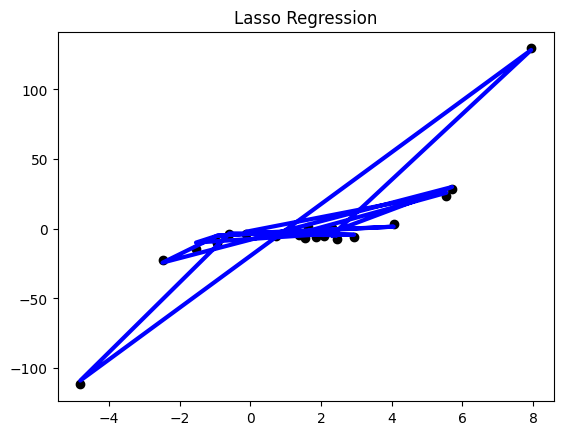

In [27]:
lasso_regressor=Lasso(alpha=0.1)
lasso_regressor.fit(X_poly,y_train)
y_pred_lasso=lasso_regressor.predict(X_test_poly)
mse_lasso=mean_squared_error(y_test,y_pred_lasso)
r2_lasso=r2_score(y_test,y_pred_lasso)
print('Lasso Regression')
print('MSE:',mse_lasso)
print('R2:',r2_lasso)
plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,y_pred_lasso,color='blue',linewidth=3)
plt.title('Lasso Regression')
plt.show()

In [28]:
results=pd.DataFrame({
    'Model':['Linear Regression','Polynomial Regression','Ridge Regression','Lasso Regression'],
    'MSE':[mse_linear,mse_poly,mse_ridge,mse_lasso],
    'R2':[r2_linear,r2_poly,r2_ridge,r2_lasso]})
print(results)

                   Model         MSE        R2
0      Linear Regression  493.196548  0.689409
1  Polynomial Regression    8.727115  0.994504
2       Ridge Regression    8.734426  0.994499
3       Lasso Regression    8.800892  0.994458
